# Maximum Likelihood Estimate view of linear regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pylab as pl
from IPython import display

## Likelihood example - 1D - Gaussian

0.0 1.0 0.0 0.0


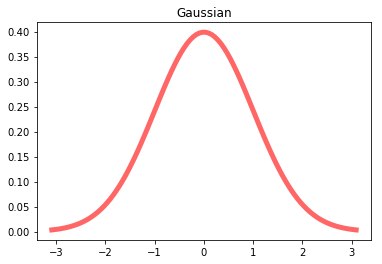

In [3]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = norm.stats(moments='mvsk')
print mean, var, skew, kurt
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')
plt.title('Gaussian')
plt.savefig('gaussian.png')

### Experiment

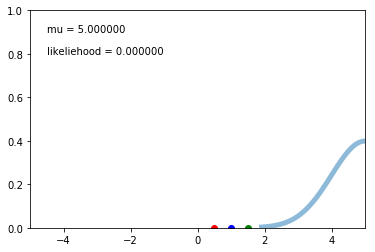

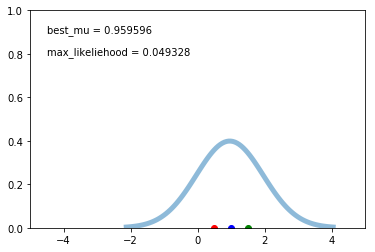

In [4]:
x1, x2, x3 = 1, .5, 1.5

max_likelihood = -1
best_mu = 0
for mu in np.linspace(-5, 5, 100):
    likelihood = norm.pdf(x1-mu) * norm.pdf(x2-mu) * norm.pdf(x3-mu)
    
    if likelihood > max_likelihood:
        max_likelihood = likelihood
        best_mu = mu
    
    fig, ax = plt.subplots(1,1)
    ax.axis([-5, 5, 0, 1])
    ax.text(-4.5, .9, 'mu = %f' % mu)
    ax.text(-4.5, .8, 'likeliehood = %f' % likelihood)
    ax.plot(x1, 0, 'bo', label='x1')
    ax.plot(x2, 0, 'ro', label='x2')
    ax.plot(x3, 0, 'go', label='x3')
    ax.plot(x+mu, norm.pdf(x), lw=5, alpha=.5)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.025)
    plt.clf()
    
fig, ax = plt.subplots(1,1)
ax.axis([-5, 5, 0, 1])
ax.text(-4.5, .9, 'best_mu = %f' % best_mu)
ax.text(-4.5, .8, 'max_likeliehood = %f' % max_likelihood)
ax.plot(x1, 0, 'bo', label='x1')
ax.plot(x2, 0, 'ro', label='x2')
ax.plot(x3, 0, 'go', label='x3')
ax.plot(x+best_mu, norm.pdf(x), lw=5, alpha=.5)


## MLE view of linear regression

In [4]:
def generate_linear_regression_data(x_start, x_end, m, c, mu, sigma, n):
    """
    Generates (x,y) data that can be used for linear regression.
    
    Samples points around a line defined by y = mx + c and add noise ~ N(mu, sigma) 
    x_start and x_end specify the x extants
    
    Return values:
        Return x, and y
    """
    x = np.linspace(x_start,x_end,n)
    y = m * x + c
    y = y + np.random.normal(mu, sigma, n)
    return x, y

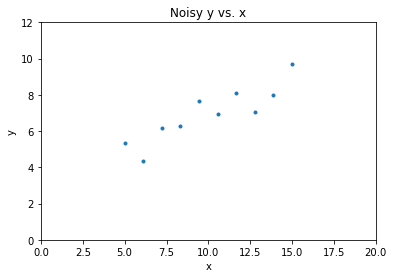

In [5]:
m, c = .5, 2
x_start, x_end = 5, 15
mu, sigma = 0, 1
n = 10

x, y = generate_linear_regression_data(x_start, x_end, m, c, mu, sigma, n)    
    
plt.title('Noisy y vs. x')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0,20,0,12])
plt.plot(x,y,'.')

In [6]:
def mle_variance_linear_regression(x, y, t0, t1):
    err = (np.sum((y - t0 - t1 * x)**2)) / float(len(x))
    return err*2

def linear_regression_vector_calculus(x, y):
    X = np.ones([len(x), 2])
    X[:,1] = x
    Y = np.ones([len(y), 1])
    Y[:,0] = y

    XtX = np.dot(X.T, X)
    XtY = np.dot(X.T, Y)

    theta = np.dot(np.linalg.inv(XtX), XtY)
    return theta[0], theta[1]

<Container object of 3 artists>

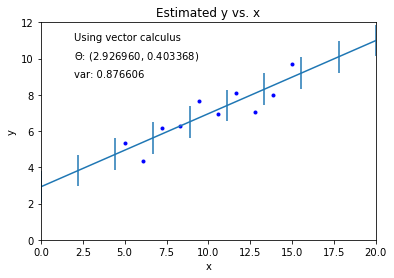

In [7]:
t0, t1 = linear_regression_vector_calculus(x, y)
y_estimate = t0 + t1*np.linspace(0,20,100)
var = mle_variance_linear_regression(x, y, t0, t1)

plt.title('Estimated y vs. x')
plt.text(2, 11, 'Using vector calculus')
plt.text(2, 10, '$\Theta$: (%f, %f)' % (t0, t1))
plt.text(2, 9, 'var: %f' % var)
plt.axis([0,20,0,12])
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,'b.')
#plt.plot(np.linspace(0,20,100),y_estimate,'r')
plt.errorbar(np.linspace(0,20,10), t0 + t1*np.linspace(0,20,10), yerr=var)